기계학습 숙제 2

1. \[overfitting; 10p\] 다음 코드를 실행하고 결과를 해석하세요.

In [1]:
import numpy as np
# Creating the data--------------
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
# numpy.random.rand function
# the function is from uniform distribution over [0, 1)
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
X = 5 + 25*np.random.rand(X_n)

Prm_c = [170, 108, 0.2]
# x_1 = 5 + 25*[a0,....,a15]
# x_2 = [b0,....,b15]
# T = 170 - 108* e^(0.2*x_1) + 4*x_2
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X)\
+4*np.random.randn(X_n)


# Linear basis function model estimation---------
def fit_gauss_func(x, t, m):
    # numpy linsapce function 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    # m is model capacity
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0] # difference between the prior and post element
    n = x.shape[0]
    # m+1 for bias
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:,j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

# Gauss function -------
# wikipedia
# https://en.wikipedia.org/wiki/Gaussian_function
def gauss(x, mu, s):
    return np.exp(-(x-mu)**2/(2 * s ** 2))

# linear basis function model MSE(mean squared error)
# wikipedia 
# https://en.wikipedia.org/wiki/Mean_squared_error
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y-t)**2)
    return mse

# linear basis function model 
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5,30,m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

# gauss basis function sign
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5,.5,.5], lw=4)

A. 코드

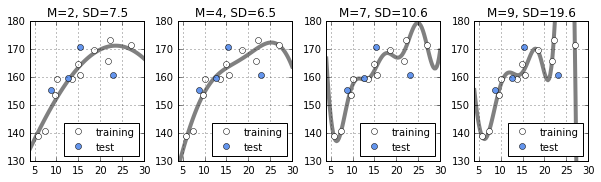

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

X_test = X[:int(X_n/4 + 1)]
T_test = T[:int(X_n/4 + 1)]
X_train = X[int(X_n/4 + 1):]
T_train = T[int(X_n/4 + 1):]

plt.figure(figsize=(10,2.5))

plt.subplots_adjust(wspace=0.3)
M = [2,4,7,9] # model capacity
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker="o",
             linestyle="None", color="white",
             markeredgecolor="black", label="training")
    plt.plot(X_test, T_test, marker="o", linestyle="None",
             color="cornflowerblue",
             markeredgecolor="black", label="test")
    plt.legend(loc="lower right", fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

위의 그림에서 M은 모델의 용량(capacity) SD(np.sqrt(mse))는 mean squared error의 평균이다. 
모델의 용량(M)이 커짐에 따라 모든 Training data에 대하여 완벽하게 학습을 하여 $E_{in}$(in-sample error)에서는 
우수한 성능을 보여주지만 $E_{out}$(out-sample error)는 성능이 떨어짐을 보여준다. 
즉, 일반화 성능이 모델 용량이 커질수록 떨어져서 training data만 잘 맞추고 test data에 대한 error는 점차 증가하고 있다.

B. 코드 

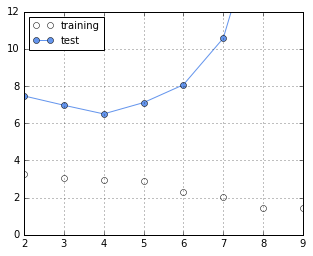

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,4))
M = range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
    
plt.plot(M, mse_train, marker="o",
         linestyle="-", color="white",
         markeredgecolor="black", label="training")
plt.plot(M, mse_test, marker="o", linestyle="-",
             color="cornflowerblue",
             markeredgecolor="black", label="test")
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0,12)
plt.grid(True)
plt.show()

위의 그림도 역시 모델의 용량(M)을 변하하면서 MSE(mean squared error)를 측정을 해보니 
모델의 용량(M)이 커질수록 training data에 대하여 MSE는 떨어지는 현상을 볼 수 있고,
test data에 대하여는 모델 용량이 4까지는 MSE이가 감소하지만 점처 모델 용량을 키울수록 MSE는 증가한다. 
즉, training data에 대하여는 error가 줄여지고 test에 대하여 error 증가하여 모델 용량이 커질수록 overfitting이 발생하는 것을 확인 할 수 있다. 


2. \[linear model; 20p\] logistic regression의 $\nabla E_{in}(w) = \frac{1}{N}\sum_{n=1}^{N}-y_nx_n\theta(-y_nw^Tx_n)$임을 보이고, 이는 오분류된 것이 정확하게 분류된것 보다 경사에 더 큰 기여를 함을 설명하세요.

logistic function($\theta$)는 다음과 같다. 

$$\theta(s) = \frac{1}{1+e^{-s}}$$

그리고 위의 logistic function는 다음과 같은 특성을 가지고 있다. 

$$1-\theta(s) = \theta(-s)$$

이진분류(+1, -1)를 하는 함수 function과 함께 error measure function을 정의하자면 

$$P(y|x) = \begin{cases}h(x) & \text{for y=+1} \\ 1-h(x) & \text{for y=-1}\end{cases}$$

하지만, 여기서 $h(x)=\theta(w^Tx)$이고 $1-\theta(s)=\theta(-s)$이라는 특성을 이용해서 위의 식은 아래와 같이 변한다. 


$$P(y|x)=\theta(yw^Tx)$$

그리고 모든 training data의 likelihood를 구하면 아래와 같다. 

$$-\frac{1}{N}ln(\prod_{n=1}^{N}P(y_{n}|x_{n}))=\frac{1}{N}\sum_{n=1}^{N}ln(\frac{1}{P(y_{n}|x_{n})})$$

이는 또한 다음과 같이 $h(x)=\theta(w^Tx)$이고 $1-\theta(s)=\theta(-s)$이라는 특성을 이용하여 변화시킨 새로운 $P(y|x)$를 이용한다면 다음과 같이 변한다. 


$$\frac{1}{N}\sum_{n=1}^{N}ln(\frac{1}{P(y_{n}|x_{n})})=\frac{1}{N}\sum_{n=1}^{N}ln\begin{cases}\frac{1}{h(x_{n})} & \text{for $y_{n}$=+1}\\\frac{1}{1-h(x_{n})} & \text{for $y_{n}$=-1}\end{cases}=\frac{1}{N}\sum_{n=1}^{N}ln(\frac{1}{\theta(y_{n}w^Tx_{n})})$$

따러서 logitic regression을 위한 in-sample error measure는 다음과 같다. 

$$E_{in}(w)=\frac{1}{N}\sum_{n=1}^{N}ln(1+e^{-y_{n}w^Tx_{n}})$$

$ln(x)$의 미분은 $\frac{1}{x}$이므로 logistic regression의 in-sample error를 w에 대하여 미분을 하면

$\nabla E_{in}(w) = \frac{1}{N}\sum_{n=1}^{N}-y_nx_n\theta(-y_nw^Tx_n)$이다.

위의 식에서 

$\theta(-y_nw^Tx_n)$는 sigmoid function으로 항상 양수를 가진다. 

하지만 $-y_nx_n$를 보면 오분류를 하는 경우에서는 항상 양수가 되고 잘 분류되면 음수가 되는 것을 알 수가 있다. 

그러므로 오분류가 되는 경우가 $\nabla E_{in}(w)$를 증가시키므로 경사에 큰 기여를 하는 것을 알 수가 있다.

3. \[logistic regression; 25p\] 다음 코드를 실행하고 결과를 해석하세요.

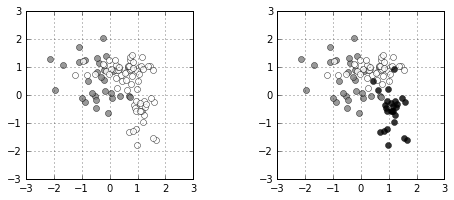

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
N = 100
K = 3
T3 = np.zeros((N,3), dtype=np.uint8)
T2 = np.zeros((N,2), dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-0.5, 0.5], [0.5, 1.0], [1.0, -0.5]])
Sig = np.array([[0.7,0.7],[0.8,0.3],[0.3,0.8]])
Pi = np.array([0.4,0.8,1.0])
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k]= 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                  + Mu[T3[n, :] == 1, k])         

#print(T3[n, :])
#print(T3[n, :] == 1)
#print(Sig[T3[n, :] == 1, k])

T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

def show_data2(x, t):
    wk, K = t.shape
    c = [[0.5,0.5,0.5],[1.0,1.0,1.0],[0.0,0.0,0.0]]
    for k in range(K):
        plt.plot(x[t[:,k] == 1, 0], x[t[:,k]== 1, 1],
                 linestyle="none", markeredgecolor = "black",
                 marker = 'o', color=c[k], alpha=0.8)
        plt.grid(True)
        
plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace=0.5)
# left
plt.subplot(1,2,1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

# right
plt.subplot(1,2,2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

위의 그림은 데이터의 분포를 보여주고 왼쪽은 2개 집합으로 구성된 데이터 분포와 
오른쪽은 3개의 집합으로 구성된 데이터 분포를 보여준다.

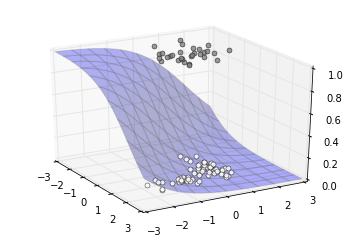

In [5]:
def logistic2(x0, x1, w):
    y = 1 /(1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color="blue", edgecolor="gray", 
                    rstride=5, cstride=5, alpha=0.3)

    
def show_data2_3d(ax, x, t):
    c = [[0.5,0.5,0.5],[1.0,1.0,1.0]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:,i] == 1, 1], 1-i,
                marker="o", color=c[i], markeredgecolor = "black",
                linestyle= "none", markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)
    
Ax = plt.subplot(1,1,1, projection="3d")
W = [-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax, X, T2)

logistic function(sigmoid) function을 이용하여 2개 집합으로 구성된 데이터 집합의 비선형 분류한 것을 
확인할 수 있다.

/home/hyunyoung2/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/hyunyoung2/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


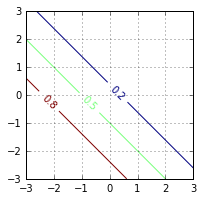

In [6]:
def show_contour_logistic2(w):
    xn = 30
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2,0.5,0.8),
                       color=["k", "cornflowerblue", "k"])
    cont.clabel(fmt="%1.1f", fontsize=10)
    plt.grid(True)
    
plt.figure(figsize=(3,3))
W=[-1,-1,-1]
show_contour_logistic2(W)

위의 그림은 logistic function의 등고선을 보여 주는 것으로 오른쪽 대각선으로 갈수록 작아지고 
왼쪽 대각선 방향으로 갈수록 logistic function 값이 커지는 것을 확인 할 수 있다.

w0 = -2.82, w1 = -0.73, w2 = 0.03
CEE = 0.36


/home/hyunyoung2/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/hyunyoung2/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


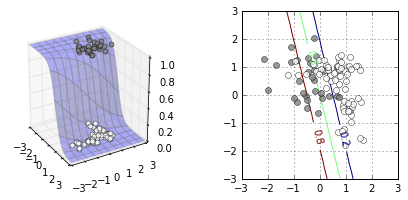

In [7]:
# logistic function with binary cross entropy 
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    # negative log-likelihood
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) + 
                    (1-t[n,0])*np.log(1-y[n]))
    cee = cee / X_n
    return cee

# 최적화를 위한 미분 함수 
def dcee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
        
    dcee = dcee / X_n
    return dcee

W = [-1,-1,-1]
dcee_logistic2(W, X, T2)

from scipy.optimize import  minimize

def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                  jac = dcee_logistic2, method="CG")
    return res.x


plt.figure(1, figsize=(7,3))
plt.subplots_adjust(wspace=0.5)


Ax = plt.subplot(1,2,1, projection="3d")
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)


show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))


Ax = plt.subplot(1,2,2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

위의 그림은 이진 분류를 위해 cross entropy를 사용하여 최적화하는 경우를 보여주는데
그림에서 알 수 있듯이 그냥 logistic function을 이용한 경우와 유사함을 보여준다.
즉, 이진 분류를 위한 cross entropy의 error function인 negative log-likelihood를 minimize함으로써 최적화하는 것은 
logistic function을 minimize하는 것하고 동등함을 실험적으로 확인할 수 있다.

4. \[bias-variance tradoff; 20p\] 데이터가 $y(x) = f(x) + \epsilon$ ($\epsilon$는 평균 0, 분산은 $\sigma^2$인 잡음)인 잡음이 포함되어 있을 때, $E_{out}(g^{(D)}) = \mathbb E_{x,y}[\bigl(g^{(D)}(x)-y(x)\bigr)^2]$부터 다음의 bias-variance tradoff 식을 유도하세요.

$E_{out}(g^{(D)}) = \mathbb E_{x,y}[\bigl(g^{(D)}(x)-y(x)\bigr)^2]$를 좀 더 간단히 표현하면 다음과 같다. 

$$E_{out}(g^{(D)}) = \mathbb E_{x}[\bigl(g^{(D)}(x)-f(x)\bigr)^2]$$

$\mathbb E_{x}$: the expected value w.r.t x


$g^{(D)}$: g은 data D에 대하여 의존성을 표현한 것이다.

먼저 Data D에 대한 의존성을 평균 값을 취함으로써 제거해보자 

$$\mathbb E_{D}[E_{out}(g^{(D)})]= \mathbb E_{D}[\mathbb E_{x}[\bigl(g^{(D)}(x)-f(x)\bigr)^2]]= \mathbb E_{x}[\mathbb E_{D}[\bigl(g^{(D)}(x)-f(x)\bigr)^2]]$$

위의 식에서 $\mathbb E_{D}[\bigl(g^{(D)}(x)-f(x)\bigr)^2]$를 계산해보자.

$$\bar g(x) {=} E_{D}[g^{(D)}(x)]$$

$\bar g(x)$의 정의는 위와 같이 하면 $\bar g(x)$는 아래와 같이 쓸 수 있다.

$$\bar g(x) \approx \frac{1}{K}\sum_{k=1}^{K}g^{D_{k}}(x)$$

위의 관계를 이용하면 $\mathbb E_{D}[\bigl(g^{(D)}(x)-f(x)\bigr)^2]$는 아래와 같이 쓸 수 있다.

$$\mathbb E_{D}[\bigl(g^{(D)}(x)-f(x)\bigr)^2]=\mathbb E_{D}[g^{(D)}(x)^2]-2\bar g(x)f(x) + f(x)^2$$

위의 식에 $\bar g(x)^2$을 더하고 빼면 


$$\mathbb E_{D}[g^{(D)}(x)^2]-\bar g(x)^2 + \bar g(x)^2 -2\bar g(x)f(x) + f(x)^2= \mathbb E_{D}[\bigl(g^{(D)}(x)-\bar g(x)\bigr)^2] + (\bar g(x)-f(x))^2$$

위의 식에서 $\bar g(x)$는 D에 관하여 상수이다. 

그러므로 out-of-sample error는 

$$\mathbb E_{D}[E_{out}(g^{(D)})] = \mathbb E_{x}[\mathbb E_{D}[\bigl(g^{(D)}(x)-f(x)\bigr)^2]]= \mathbb E_{x}[bias(x)+var(x)]= \mathbb E_{x}[bias(x)] + \mathbb E_{x}[var(x)] = bias + var$$

위와 같으므로 $\mathbb E_{D}$는 상수이므로 bias와 variance이 trade-off관계에 있다.  


5. \[regularization; 25p\] 가중치 감쇠의 경우, 

A. $|w_{reg}|\le|w_{lin}|$을 증명하세요. (Hint: $|w_{reg}| > |w_{lin}|$ 가정이 모순임을 보임

$E_{in}(w) = \frac{1}{N}(Zw-y)^T(Zw-y)$에 규제(ridge)를 걸 때, $|w_{reg}| > |w_{lin}|$이라고 하자.

$E_{in}(w) = \frac{1}{N}(Zw-y)^T(Zw-y)$를 최소화하려고 한다면, 

$\nabla E_{in}(w)=0$ 이고 $2Z^T(Zw-y)=0$이므로

$w_{lin}$는 다음과 같다.

$$w_{lin} = (Z^TZ)^{-1}Z^Ty$$

$E_{in}(w) = \frac{1}{N}(Zw-y)^T(Zw-y)$를 regularization(ridge)를 건 $E_{aug}$는 다음과 같다. 

$$E_{aug}(w) = E_{in}(w) + \frac{\lambda}{N}w^Tw$$를 최소화하려고 한다면,

$\nabla E_{aug}(w)=0$ 이고 $2Z^T(Zw-y)+2\lambda w=0$이므로

위의 최소화하려고 할때, $w_{reg}$는 다음과 같다. 

$$w_{reg}=(Z^TZ+\lambda I)^{-1}Z^Ty$$

$w_{lin}$는 $w_{reg}$에서 $\lambda = 0$일 때이므로 

$|w_{reg}| > |w_{lin}|$는 모순이 된다. 

따라서 $|w_{reg}|\le|w_{lin}|$이 성립된다.

B. $\lambda \ge 0$, $E_{in}$가 미분 가능하면 아래의 두 식이 동일함을 보이세요.

$$w(t+1) \leftarrow w(t) - \eta \nabla E_{aug}(w(t))$$

$$w(t+1) \leftarrow (1-2\eta\lambda)w(t) - \eta \nabla E_{in}(w(t))$$

위의 식을 w에 관하여 $\nabla E_{aug}(w)$와 $\nabla E_{in}(w)$구하면 

$\nabla E_{in}(w)$는 다음과 같다. 

$$\nabla E_{in}(w)=2Z^T(Zw-y)$$

그리고 $(1-2\eta\lambda)w(t) - \eta \nabla E_{in}(w(t))$에 위의 식을 대입하면 

$$(1-2\eta\lambda)w(t) - 2\eta (Z^T(Zw(t)-y))=w(t) - 2\eta (Z^T(Zw(t)-y)+\lambda w(t))$$

$\nabla E_{aug}(w)$는 다음과 같다. 

$$\nabla E_{aug}(w)=2Z^T(Zw-y)+2\lambda w$$

그리고 $w(t) - \eta \nabla E_{aug}(w(t))$에 위의 식을 대입하면

$$w(t) - 2\eta (Z^T(Zw(t)-y)+\lambda w(t))$$

따라서 $(1-2\eta\lambda)w(t) - \eta \nabla E_{in}(w(t))$와 $w(t) - \eta \nabla E_{aug}(w(t))$는 동일하다.

# Reference 

 - [mathjax on stackoverflow](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)
 
kor

 - [math notation](https://librewiki.net/wiki/%EC%88%98%ED%95%99_%EA%B8%B0%ED%98%B8)